<a href="https://colab.research.google.com/github/gilgameshjw/Algorithm1_2025/blob/aigerim/Exo5%2C6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exo5.  Problem 2 (Sparse representation of graphs, 5/10 pts). Given the following CSC (Compressed
 Sparse Column) representations for two graphs on vertices {A,B,C,D,E} (indexed as A→0,
 B→1, C→2, D→3, E→4)

Adjacency Matrix (Graph 1, undirected):
[[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 1 0]
 [0 1 1 0 1]
 [0 0 0 1 0]]


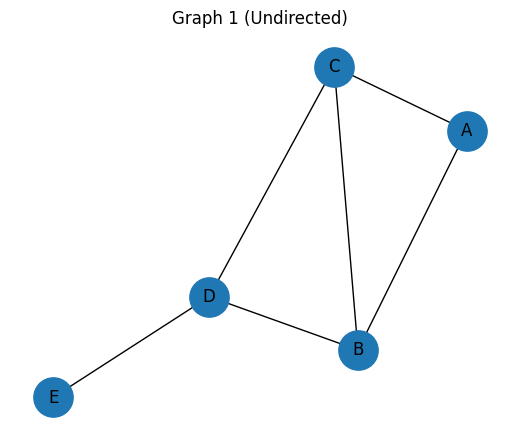


Adjacency Matrix (Graph 2, directed):
[[0 1 1 0 0]
 [0 0 1 0 1]
 [0 0 0 1 0]
 [0 1 0 0 1]
 [0 0 0 0 0]]


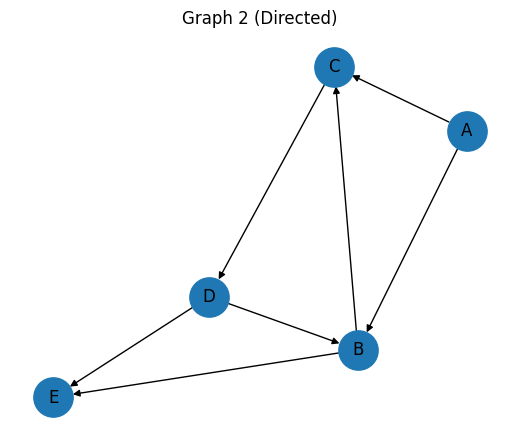


Cycles in Graph 2: [[1, 2, 3]]
Unique cycle is:
B -> C -> D -> B


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def csc_to_adj(n, col_pointers, row_indices, values, directed=False):
    adj = np.zeros((n, n), dtype=int)
    for col in range(n):
        start = col_pointers[col]
        end = col_pointers[col+1]
        rows = row_indices[start:end]
        for r in rows:
            adj[r, col] = 1   # edge r -> col
            if not directed:
                adj[col, r] = 1  # mirror for undirected
    return adj
#Graph 1(undirected)
col_p_1 = [0, 2, 5, 8, 11, 12]
row_1  = [1,2, 0,2,3, 0,1,3, 1,2,4, 3]
val_1  = [1]*12

n = 5  # A,B,C,D,E

adj1 = csc_to_adj(n, col_p_1, row_1, val_1, directed=False)
print("Adjacency Matrix (Graph 1, undirected):")
print(adj1)

G1 = nx.from_numpy_array(adj1)
labels = {0:"A",1:"B",2:"C",3:"D",4:"E"}
pos = nx.spring_layout(G1)

plt.figure(figsize=(5,4))
nx.draw(G1, pos, with_labels=True, labels=labels, node_size=800)
plt.title("Graph 1 (Undirected)")
plt.show()

#Graph 2(directed)
col_p_2 = [0,0,2,4,5,7]
row_2 = [0,3, 0,1, 2, 1,3]
val_2 = [1]*7

adj2 = csc_to_adj(n, col_p_2, row_2, val_2, directed=True)
print("\nAdjacency Matrix (Graph 2, directed):")
print(adj2)

G2 = nx.from_numpy_array(adj2, create_using=nx.DiGraph())
plt.figure(figsize=(5,4))
nx.draw(G2, pos, with_labels=True, labels=labels, node_size=800, arrows=True)
plt.title("Graph 2 (Directed)")
plt.show()

cycles = list(nx.simple_cycles(G2))
print("\nCycles in Graph 2:", cycles)

letter = {0:"A",1:"B",2:"C",3:"D",4:"E"}

if cycles:
    cycle_letters = " -> ".join(letter[i] for i in cycles[0]) + " -> " + letter[cycles[0][0]]
    print("Unique cycle is:")
    print(cycle_letters)

Problem 1 (Facebook Interview, 10/10 pts). We consider trees of n children, each with weight
 1/n of their parent’s weight

In [ ]:
from collections import deque
#1.General class for this object
class TreeNode:
    def __init__(self, weight):
        self.weight = weight
        self.children = []
#2Generate a tree of depth N with each child weight = 1/n of parent
def build_tree(n, depth, weight):
    root = TreeNode(weight)
    if depth == 0:
        return root
    child_weight = weight / n
    for _ in range(n):
        root.children.append(build_tree(n, depth - 1, child_weight))
    return root
#3.Depth-first recursive function summing weights
def dfs_sum(root):
    total = root.weight
    for c in root.children:
        total += dfs_sum(c)
    return total
#4.Breadth-first summation
def bfs_sum(root):
    q = deque([root])
    total = 0
    while q:
        node = q.popleft()
        total += node.weight
        for c in node.children:
            q.append(c)
    return total

#5.DFS and BFS with sign flipping at each visited node
def dfs_sign_flip(root):
    root.weight *= -1
    total = root.weight
    for c in root.children:
        total += dfs_sign_flip(c)
    return total

def bfs_sign_flip(root):
    q = deque([root])
    total = 0
    while q:
        node = q.popleft()
        node.weight *= -1
        total += node.weight
        for c in node.children:
            q.append(c)
    return total
#6.Recursive and non-recursive BFS
def bfs_recursive(queue, total=0):
    if not queue:
        return total
    node = queue.popleft()
    total += node.weight
    for c in node.children:
        queue.append(c)
    return bfs_recursive(queue, total)

def bfs_recursive_start(root):
    return bfs_recursive(deque([root]))

def bfs_iterative(root):
    q = deque([root])
    total = 0
    while q:
        node = q.popleft()
        total += node.weight
        for c in node.children:
            q.append(c)
    return total
# 7.Explanation(as a string so entire task is included in one file)
explanation = """
Depth-first search (DFS) naturally goes deep by following one child at a time.
This matches recursion perfectly because each recursive call goes deeper.
Breadth-first search (BFS) processes nodes level by level.
This requires a queue to hold all nodes from each level.

Recursive BFS is not recommended because:
- you still need a queue anyway
- recursion adds stack frames for every visit
- on large trees recursion can overflow the call stack
- it is less efficient and more memory-heavy than the iterative version
Therefore BFS should almost always be implemented iteratively.
"""

#TTESTING EVERYTHING
if __name__ == "__main__":
    print("=== Testing Tree Summations for multiple n values ===")
    for n in [2, 3, 4, 10]:
        tree = build_tree(n, depth=3, weight=1/n)
        print(f"n={n} | DFS sum = {dfs_sum(tree)} | BFS sum = {bfs_sum(tree)}")

    print("\n=== Testing Sign Flip Versions (DFS, BFS) ===")
    n = 3
    tree = build_tree(n, depth=3, weight=1/n)
    print("DFS sign 1:", dfs_sign_flip(tree))
    print("DFS sign 2:", dfs_sign_flip(tree))

    tree = build_tree(n, depth=3, weight=1/n)
    print("BFS sign 1:", bfs_sign_flip(tree))
    print("BFS sign 2:", bfs_sign_flip(tree))

    print("\n=== Testing BFS Recursive & Iterative ===")
    tree = build_tree(3, depth=3, weight=1/3)
    print("BFS recursive sum:", bfs_recursive_start(tree))

    tree = build_tree(3, depth=3, weight=1/3)
    print("BFS iterative sum:", bfs_iterative(tree))

    print("\nExplanation of why BFS recursion is discouraged:\n")
    print(explanation)
